# Machine learning - KNN - Oscar Rotten Toamatoes

In [1]:
import os
import pandas as pd
import pickle


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [2]:
os.chdir("../tratados")
os.getcwd()

'/home/antero/Documentos/tcc/tratados'

## Importando o Dataframe

In [3]:
with open('oscar_rotten.pkl', 'rb') as f:
    df_rotten_tomatoes_oscars=pickle.load(f)

In [4]:
df_rotten_tomatoes_oscars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16370 entries, 0 to 16369
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       16370 non-null  object 
 1   content_rating                    16370 non-null  object 
 2   genres                            16363 non-null  object 
 3   directors                         16219 non-null  object 
 4   original_release_date             16370 non-null  object 
 5   production_company                16061 non-null  object 
 6   tomatometer_status                16370 non-null  object 
 7   tomatometer_rating                16370 non-null  float64
 8   tomatometer_count                 16370 non-null  float64
 9   audience_status                   16219 non-null  object 
 10  audience_rating                   16370 non-null  float64
 11  audience_count                    16370 non-null  float64
 12  toma

### Divisão entre previsores e classe

In [5]:
X_rotten_oscars = df_rotten_tomatoes_oscars.iloc[:, [7,8,10,11,12,13,14]]

In [6]:
Y_rotten_tomatoes_nominee = df_rotten_tomatoes_oscars.iloc[:, 17]

In [7]:
Y_rotten_tomatoes_winner = df_rotten_tomatoes_oscars.iloc[:, 16]

### Escalonamento dos valores

In [8]:
label_encoder = LabelEncoder()
scaler = StandardScaler()

### Tratamento de atributos categóricos

In [9]:
X_rotten_oscars = scaler.fit_transform(X_rotten_oscars)
Y_rotten_tomatoes_nominee = label_encoder.fit_transform(Y_rotten_tomatoes_nominee)
Y_rotten_tomatoes_winner = label_encoder.fit_transform(Y_rotten_tomatoes_winner)

### KNN Nominee

### Tuning dos Parâmetros com GridSearch

In [10]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros, n_jobs=6)
grid_search.fit(X_rotten_oscars , Y_rotten_tomatoes_nominee)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'algorithm': 'auto', 'n_neighbors': 20, 'p': 1}
0.949847281612706


#### Divisão Treinamento e Teste

In [10]:
X_rotten_oscars_treinamento, X_rotten_oscars_teste, Y_rotten_oscars_nominee_treinamento, Y_rotten_oscars_nominee_teste = train_test_split(X_rotten_oscars, Y_rotten_tomatoes_nominee,test_size = 0.25, random_state = 0)

#### Previsões 

In [11]:
knn_oscars_nominee = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 20, p = 1)
knn_oscars_nominee.fit(X_rotten_oscars_treinamento,Y_rotten_oscars_nominee_treinamento);
previsoes_rotten_nominee = knn_oscars_nominee.predict(X_rotten_oscars_teste)

#### Acurácia

In [12]:
accuracy_score(Y_rotten_oscars_nominee_teste, previsoes_rotten_nominee)

0.9469826533105302

#### Matriz de Confusão 

In [13]:
confusion_matrix(Y_rotten_oscars_nominee_teste, previsoes_rotten_nominee)

array([[3873,    6],
       [ 211,    3]])

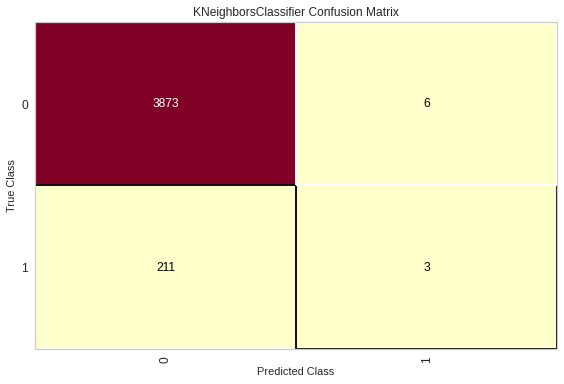

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [14]:
cm_nominee = ConfusionMatrix(knn_oscars_nominee)
cm_nominee.fit(X_rotten_oscars_treinamento, Y_rotten_oscars_nominee_treinamento)
cm_nominee.score(X_rotten_oscars_teste, Y_rotten_oscars_nominee_teste)
cm_nominee.show()

#### Claissification Report

In [16]:
print(classification_report(Y_rotten_oscars_nominee_teste, previsoes_rotten_nominee))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3879
           1       0.33      0.01      0.03       214

    accuracy                           0.95      4093
   macro avg       0.64      0.51      0.50      4093
weighted avg       0.92      0.95      0.92      4093



### KNN Winner

### Tuning dos Parâmetros com GridSearch

In [11]:
parametros = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros, n_jobs=6)
grid_search.fit(X_rotten_oscars , Y_rotten_tomatoes_winner)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'algorithm': 'auto', 'n_neighbors': 20, 'p': 2}
0.8683567501527184


#### Divisão Treinamento e Teste

In [10]:
X_rotten_oscars_treinamento, X_rotten_oscars_teste, Y_rotten_oscars_winner_treinamento, Y_rotten_oscars_winner_teste = train_test_split(X_rotten_oscars, Y_rotten_tomatoes_winner,test_size = 0.25, random_state = 0)

#### Previsões 

In [11]:
knn_oscars_winner = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 20, p = 2)
knn_oscars_winner.fit(X_rotten_oscars_treinamento,Y_rotten_oscars_winner_treinamento);
previsoes_rotten_winner = knn_oscars_winner.predict(X_rotten_oscars_teste)

#### Acurácia

In [12]:
accuracy_score(Y_rotten_oscars_winner_teste, previsoes_rotten_winner)

0.8631810408013681

#### Matriz de Confusão 

In [17]:
confusion_matrix(Y_rotten_oscars_winner_teste, previsoes_rotten_winner)

array([[3449,   70],
       [ 490,   84]])

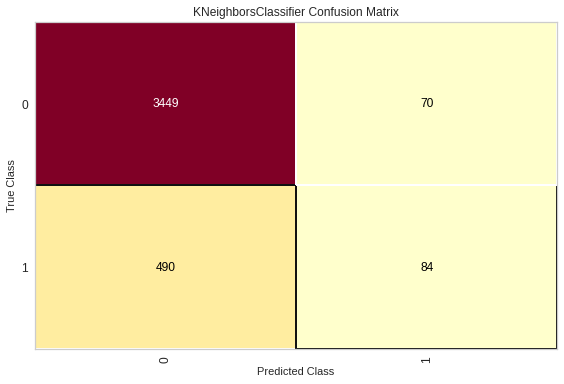

<AxesSubplot:title={'center':'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [18]:
cm_winner = ConfusionMatrix(knn_oscars_winner)
cm_winner.fit(X_rotten_oscars_treinamento, Y_rotten_oscars_winner_treinamento)
cm_winner.score(X_rotten_oscars_teste, Y_rotten_oscars_winner_teste)
cm_winner.show()

#### Claissification Report

In [19]:
print(classification_report(Y_rotten_oscars_winner_teste, previsoes_rotten_winner))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      3519
           1       0.55      0.15      0.23       574

    accuracy                           0.86      4093
   macro avg       0.71      0.56      0.58      4093
weighted avg       0.83      0.86      0.83      4093

